# **H1N1 Vaccine Predictions**
In the code below, we will be building a random forest model to predict the liklyhood of someone getting an H1N1 vaccine. The H1N1 virus strain was first recognized in 1919 pandemic, circulates as a seasonal flu virus, and originated from pigs. Symptoms of this virus include a fever, sore throat, chills, and a cough but it is prevetable through vaccination. In 2009, the US conducted it's first H1N1 Flu Survey in order to better understand how certain factors such as social, economic, and demographic backgrounds, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission affect who gets an H1N1 vaccine. 

The data for this study was provided by http://drivendata.org

## Downloading Data 

First, we need to import the training features and labels datasets, and the test features dataset. 

* Training_features: Includes 35 feature columns, each in response to a survey question about the respondants background and their openion on vaccinations. Information for each column can be found at https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/

* Training_labels: Includes two columns `h1n1_vaccine` and `seasonal_vaccine` which are binary labels corresponding with the training features. A 1 indicates that the person has received a vaccine and a 0 means the person has not received a vaccine. However, for the purpose of this exercise we will only be using the `h1n1_vaccine` label. 

* Test_features: These are features that are used to generate the predictions after the model has been trainned using the datasets above.

In [1]:
## Import Packages
from pathlib import Path

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 100)

In [2]:
##Import Data
features_df = pd.read_csv(
    "training_features.csv", 
    index_col="respondent_id"
)
labels_df = pd.read_csv(
    "training_labels.csv", 
    index_col="respondent_id"
)

test_features_df = pd.read_csv(
    "test_features.csv",
    index_col="respondent_id"
)

In [118]:
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [119]:
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [120]:
print("test_features_df.shape", test_features_df.shape)
test_features_df.head()

test_features_df.shape (26708, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [3]:
#make sure features and corresponding labels have same number of rows
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [4]:
join_df=features_df.join(labels_df)
join_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


## Data Preperation

When preparing our data there are three main processes we want to think about: dealing with Nans, outliers, and feature processing. We have decided to delete any columns that are made up of more than 50% Nans, and to replace the rest of the Nans with the most common value in the column. We will then perform a data exploration to see if there are many outliers and one hot encode any columns necessary. 

### Labels
First lets have a brief look at the distribution of the test label.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'h1n1 vaccine'}>

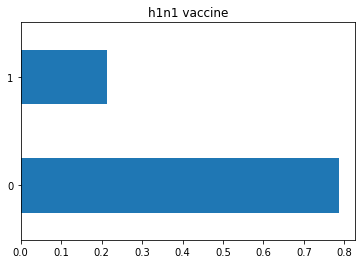

In [6]:
n_obs = join_df.shape[0]

(join_df['h1n1_vaccine']
     .value_counts()
     .div(n_obs)
     .plot.barh(title="h1n1 vaccine")
)

### Features
Let's delete any column that more than 50% of it's values are `Nan`, and replace the remaining columns `Nan` with the most common value of the column.

In [7]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(join_df)

Your selected dataframe has 37 columns.
There are 30 columns that have missing values.


,Missing Values,% of Total Values
employment_occupation,13470,50.4
employment_industry,13330,49.9
health_insurance,12274,46.0
income_poverty,4423,16.6
doctor_recc_h1n1,2160,8.1
doctor_recc_seasonal,2160,8.1
rent_or_own,2042,7.6
employment_status,1463,5.5
marital_status,1408,5.3
education,1407,5.3


In [10]:
# Get the columns with > 50% missing
missing_df = missing_values_table(join_df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 37 columns.
There are 30 columns that have missing values.
We will remove 1 columns.


In [11]:
# Drop the columns
join_df = join_df.drop(columns = list(missing_columns))

### Feature Visualization
Let's take a quick look at some of the features

In [12]:
cols_to_plot1 = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk'
]
cols_to_plot2 = [
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc'
]

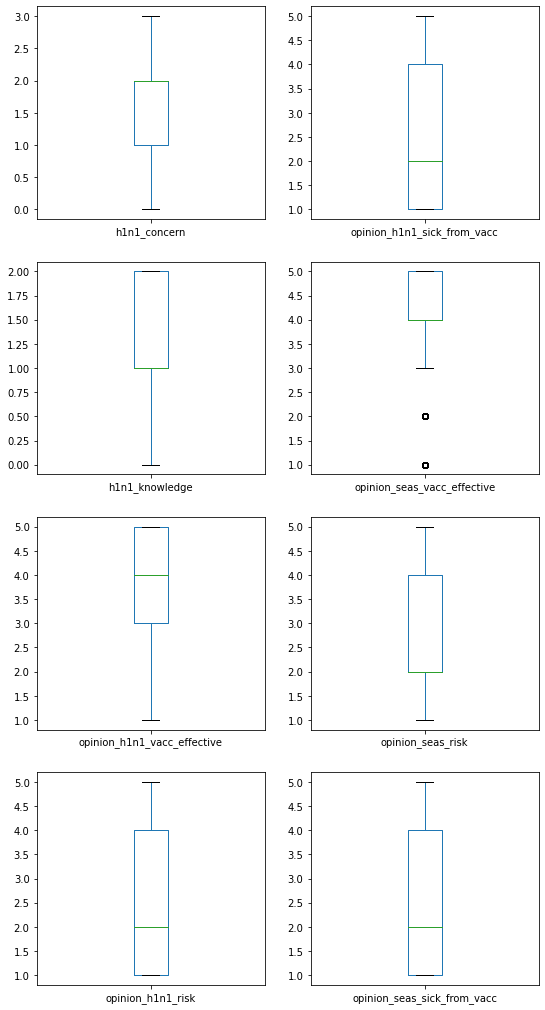

In [13]:
fig, ax = plt.subplots(
    len(cols_to_plot1), 2,figsize=(9,len(cols_to_plot1)*4.5)
)
for idx, i in enumerate(cols_to_plot1):
    (join_df[i]
    .plot.box(ax=ax[idx,0])
    )
for idx, i in enumerate(cols_to_plot2):
    (join_df[i]
    .plot.box(ax=ax[idx,1])
    )

The graphs above give us a good idea of the distribution of some of the feature variables. We can also see that we have a couple of outliers in the `openion_seas_risk` column but since random forests bin outliers we don't need to worry about them right now.

## Feature Engineering

Since sklearn can't use categorical variables, we need to one-hot encode some of our data before building a model. One-hot encoding takes categorical variables and and converts them into numerical representations without any arbitrary ordering.

In [14]:
## One hot encode variables

###drop catagorical variables
only_numbers_df=join_df.drop(['income_poverty','marital_status','rent_or_own','hhs_geo_region',
                            'census_msa','employment_industry',
                              'age_group','education','race','sex','employment_status','seasonal_vaccine'],axis=1)
only_numbers_df.head()


### Select the categorical columns to one hot encode
categorical_subset = join_df[['age_group','education','race','sex',
                              'employment_status','income_poverty','marital_status','rent_or_own']]

### One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

### Join the two dataframes using concat
### Make sure to use axis = 1 to perform a column bind
features = pd.concat([only_numbers_df, categorical_subset], axis = 1)

In [15]:
# Separate out the features and target
features=features.drop(['h1n1_vaccine'],axis=1)
labels = pd.DataFrame(join_df['h1n1_vaccine'])

In [16]:
from sklearn.impute import SimpleImputer
features = features.fillna(features.mode().iloc[0])

In [17]:
np.isnan(features).sum()

h1n1_concern                                0
h1n1_knowledge                              0
behavioral_antiviral_meds                   0
behavioral_avoidance                        0
behavioral_face_mask                        0
behavioral_wash_hands                       0
behavioral_large_gatherings                 0
behavioral_outside_home                     0
behavioral_touch_face                       0
doctor_recc_h1n1                            0
doctor_recc_seasonal                        0
chronic_med_condition                       0
child_under_6_months                        0
health_worker                               0
health_insurance                            0
opinion_h1n1_vacc_effective                 0
opinion_h1n1_risk                           0
opinion_h1n1_sick_from_vacc                 0
opinion_seas_vacc_effective                 0
opinion_seas_risk                           0
opinion_seas_sick_from_vacc                 0
household_adults                  

In [135]:
features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,1,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0


## Training and Evaluation
Let's get ready to train and evaluate our model!

We are going to split our available data into a training and evaluation set. The "test set" is being reserved to use in the final predictions we make.

In [18]:
#Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
#Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            labels, test_size = 0.3, 
                                                                            random_state = 42)

In [19]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Test Features Shape:', test_features.shape)
print('Test Labels Shape:', test_labels.shape)

Training Features Shape: (18694, 48)
Training Labels Shape: (18694, 1)
Test Features Shape: (8013, 48)
Test Labels Shape: (8013, 1)


Now let's train the model.

In [20]:
from sklearn.ensemble import RandomForestClassifier

#Create the model with 500 trees
model = RandomForestClassifier(n_estimators=500, 
                               bootstrap = True,
                               max_features = 'sqrt')
#Fit on training data
model.fit(train_features, train_labels.values.ravel())

RandomForestClassifier(max_features='sqrt', n_estimators=500)

In [21]:
train_rf_predictions = model.predict(train_features)
train_rf_probs = model.predict_proba(train_features)[:, 1]

#Actual class predictions
rf_predictions = model.predict(test_features)
#Probabilities for each class
rf_probs = model.predict_proba(test_features)[:, 1]

In [22]:
print("rf_probs.shape", rf_probs.shape)

rf_probs.shape (8013,)


In [23]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": rf_probs,
        
    },
    index = test_labels.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
15772,0.4540
9407,0.1180
16515,0.0800
23353,0.1780
10008,0.1628


Now we need to plot a ROC curve.

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
RANDOM_SEED = 6    #Set a random seed for reproducibility!

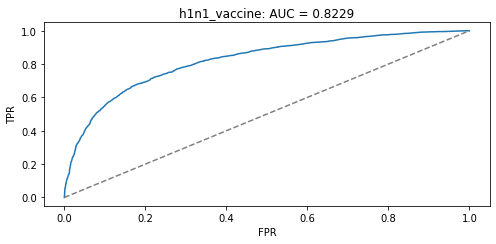

In [25]:
fig, ax=plt.subplots(1, 1, figsize=(7, 3.5))

fpr, tpr, thresholds=roc_curve(test_labels['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'])
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
ax.set_ylabel('TPR')
ax.set_xlabel('FPR')
ax.set_title(
        f"{'h1n1_vaccine'}: AUC = {roc_auc_score(test_labels['h1n1_vaccine'], y_preds['h1n1_vaccine']):.4f}"
    )
fig.tight_layout()

An AUC score of 0.5 is no better than random, and an AUC score of 1.0 is a perfect model. Our score of around 0.82 isn't great, but it's not bad either!

In [26]:
roc_auc_score(test_labels, y_preds)

0.8229183345966784

## Retrain Model on Full Dataset

In [27]:
%%time 

model.fit(features, labels.values.ravel())

None   #So we don't print out the whole pipeline representation

CPU times: user 16.2 s, sys: 586 ms, total: 16.8 s
Wall time: 16.8 s


## Use Model on Test Data
We are now going to perform the same data preparation done above on the test data.

In [146]:
#Get rid of Nans
missing_values_table(test_features_df)

Your selected dataframe has 35 columns.
There are 30 columns that have missing values.


,Missing Values,% of Total Values
employment_occupation,13426,50.3
employment_industry,13275,49.7
health_insurance,12228,45.8
income_poverty,4497,16.8
doctor_recc_h1n1,2160,8.1
doctor_recc_seasonal,2160,8.1
rent_or_own,2036,7.6
employment_status,1471,5.5
marital_status,1442,5.4
education,1407,5.3


In [147]:
#Get the columns with > 50% missing
missing_df = missing_values_table(test_features_df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 35 columns.
There are 30 columns that have missing values.
We will remove 1 columns.


In [148]:
#Drop the columns
test_features_df = test_features_df.drop(columns = list(missing_columns))

In [149]:
#One hot encode variables

##Drop catagorical variables not relevant
only_numbers_df=test_features_df.drop(['income_poverty','marital_status','rent_or_own','hhs_geo_region',
                            'census_msa','employment_industry',
                              'age_group','education','race','sex','employment_status'],axis=1)
only_numbers_df.head()


##Select the categorical columns to one hot encode
categorical_subset = test_features_df[['age_group','education','race','sex','employment_status',
                                      'income_poverty','marital_status','rent_or_own']]

##One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

##Join the two dataframes using concat
##Make sure to use axis = 1 to perform a column bind
test_df = pd.concat([only_numbers_df, categorical_subset], axis = 1)
test_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,3.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,1.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,1.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,0.0,1.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0


Now let's run the test data through the model we have built and get a data frame with the probabilities of each persons likelyhood to get an h1n1 vaccine.

In [150]:
from sklearn.impute import SimpleImputer
test_df = test_df.fillna(test_df.mode().iloc[0])

In [151]:
np.isnan(test_df).sum()

h1n1_concern                                0
h1n1_knowledge                              0
behavioral_antiviral_meds                   0
behavioral_avoidance                        0
behavioral_face_mask                        0
behavioral_wash_hands                       0
behavioral_large_gatherings                 0
behavioral_outside_home                     0
behavioral_touch_face                       0
doctor_recc_h1n1                            0
doctor_recc_seasonal                        0
chronic_med_condition                       0
child_under_6_months                        0
health_worker                               0
health_insurance                            0
opinion_h1n1_vacc_effective                 0
opinion_h1n1_risk                           0
opinion_h1n1_sick_from_vacc                 0
opinion_seas_vacc_effective                 0
opinion_seas_risk                           0
opinion_seas_sick_from_vacc                 0
household_adults                  

In [152]:
#Actual class predictions
rf_predictions = model.predict(test_df)
#Probabilities for each class
rf_probs = model.predict_proba(test_df)[:, 1]

In [154]:
final_preds = pd.DataFrame(
    {
        "h1n1_vaccine": rf_probs,
        
    },
    index = test_df.index
)
print("final_preds.shape:", final_preds.shape)
final_preds.head(10)

final_preds.shape: (26708, 1)


,h1n1_vaccine
respondent_id,
26707,0.142
26708,0.032
26709,0.546
26710,0.486
26711,0.258
26712,0.498
26713,0.530
26714,0.098
26715,0.020
